# PREDICTING INCOME LEVELS USING CENSUS DATA

## Introduction & Project Overview

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Dataset Citation: Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.


This project analyzes the Adult Income dataset to predict whether an individual earns more than $50K a year. Various machine learning models were used to achieve an optimal prediction. We conducted exploratory data analysis (EDA), feature engineering, and applied different classifiers like Random Forest.



### Attribute Information: 

**age**: continuous.\
**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\
**fnlwgt**: continuous.\
**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.\
**education-num**: continuous.\
**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.\
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.\
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.\
**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.\
**sex**: Female, Male.\
**capital-gain**: continuous.\
**capital-loss**: continuous.\
**hours-per-week**: continuous.\
**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.\
**class**: >50K, <=50K

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

## Loading and Understanding the Data
We start by loading the Adult dataset, followed by checking the structure and summary statistics. The dataset contains various demographic information about individuals and their corresponding income.

In [2]:
#### Extracting Header Names from the adult.names file
names = 'dataset_adult/adult.names'
head = []
test = True
with open(names, 'r') as file:
    for line in file:
        if (line.startswith("|")):
            continue
        else:
            if( ":" in line):
                test = line.split(":")[0]
                head.append(test)

head.append("class")
head

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [3]:
adults_data = pd.read_csv("dataset_adult/adult.data", delimiter=', ', names=head)
adults_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# loading the testing data set
adults_test =  pd.read_csv("dataset_adult/adult.test", delimiter=', ', names=head)
adults_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.


In [5]:
print("Number of Observations in adult dataset:", adults_data.shape)
adults_data.info()

Number of Observations in adult dataset: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Meta data
adults_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Preprocessing

Before applying machine learning models, we need to preprocess the data, including handling missing values, encoding categorical variables, and scaling numeric features.

In [7]:
# checking if there is any null values in the data
adults_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [8]:
# checking for duplicates
adults_data.duplicated().sum()

np.int64(24)

In [9]:
# Separate categorical and numberical columns
cat_col = adults_data.dtypes[adults_data.dtypes == 'object']
num_col = adults_data.dtypes[adults_data.dtypes != 'object']
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adults_data[col].value_counts()
    percent = adults_data[col].value_counts() / adults_data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
workclass                        
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
education                    
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Pres

**Native-Country, Occupation, Workclass** : 
has unknown values represented by ?

In [10]:
adults_data[adults_data['workclass'] == "?"].head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K


In [11]:
# replacing the ? with the null values
adults_data.replace('?', np.nan, inplace=True)

In [12]:
adults_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

Dropping rows with null values since they constitute a small percentage of the overall dataset

In [13]:
adults_data.dropna(inplace=True) 

In [14]:
adults_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [15]:
adults_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [16]:
# checking duplicates
adults_data.duplicated().sum()

np.int64(23)

In [17]:
adults_data[adults_data.duplicated()].head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [18]:
# verrifying the duplicate rows
adults_data[adults_data['fnlwgt']== 308144]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [19]:
# dropping the duplicate rowss
adults_data.drop_duplicates(inplace=True)
adults_data.duplicated().sum()

np.int64(0)

In [20]:
print(adults_data.shape)
adults_data.head(2)

(30139, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [21]:
# checking the unique values in the data set
for i in adults_data:
    if (adults_data[i].dtypes == "object"):
        print(adults_data[i].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal

### Encoding the train data

In [22]:
adults_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [23]:
# adults_data[adults_data['education'] == "Preschool"]
# dropping unnecessary columns  - Education is same as education-num
adults_data.drop("education", axis = 1, inplace=True)

In [24]:
adults_data.head(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [25]:
adults_data_encode = adults_data # storing a copy of the data frame

### Encoding Binary Target Variable
We encode the binary target variable `class` as 0 for `<=50K` and 1 for `>50K` to prepare it for machine learning models.

In [26]:
binary_columns = ['class']
for column in binary_columns:
    adults_data_encode[column]=adults_data_encode[column].replace({"<=50K":0, ">50K":1 })
    
adults_data_encode.tail(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [27]:
adults_data_encode.info()
print(adults_data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education-num   30139 non-null  int64 
 4   marital-status  30139 non-null  object
 5   occupation      30139 non-null  object
 6   relationship    30139 non-null  object
 7   race            30139 non-null  object
 8   sex             30139 non-null  object
 9   capital-gain    30139 non-null  int64 
 10  capital-loss    30139 non-null  int64 
 11  hours-per-week  30139 non-null  int64 
 12  native-country  30139 non-null  object
 13  class           30139 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.4+ MB
(30139, 14)


In [28]:
categorical_values = adults_data.select_dtypes("object").columns.tolist()
categorical_values

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [29]:
adults_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

### One-Hot Encoding Categorical Variables - Train Data
We apply one-hot encoding to categorical columns to convert them into a format suitable for machine learning models.

In [30]:
# One-Hot Encoding
adults_data_encode = pd.get_dummies(adults_data_encode, columns=categorical_values, drop_first=True) # one hot encoding
adults_data_encode.shape

(30139, 82)

In [31]:
adults_data_encode.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-chi

In [32]:
adults_data_encode.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## Exploratory Data Analysis (EDA)

Here we visualize the distribution of age groups, workclass, and gender, and how they are related to income. This will help us better understand patterns in the data.

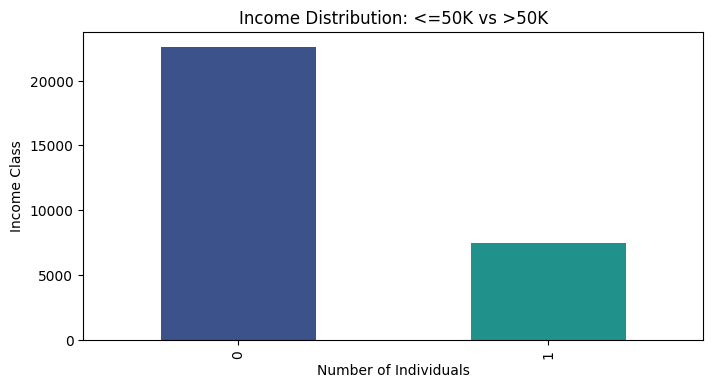

In [33]:
class_info = adults_data['class'].value_counts()
class_info.plot(kind='bar', stacked=True, figsize=(8,4), color=['#3b528b', '#21918c'])
plt.title('Income Distribution: <=50K vs >50K', fontsize=12)
plt.xlabel('Number of Individuals')
plt.ylabel('Income Class')
# plt.savefig('classdist.png', bbox_inches='tight')
plt.show()

The horizontal bar chart illustrates the income distribution of individuals, showing that 22,633 earn less than or equal to $50K, while 7506 earn more than $50K.

In [34]:
adults_data.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86])

In [35]:
# Feature Engineering create bins for the age 
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# Create a new column 'age_group' based on the bins
adults_data['age_group'] = pd.cut(adults_data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [36]:
adults_data['age_group'].value_counts()

age_group
31-40     8160
21-30     7591
41-50     6704
51-60     3886
10-20     1993
61-70     1422
71-80      309
81-90       74
91-100       0
Name: count, dtype: int64

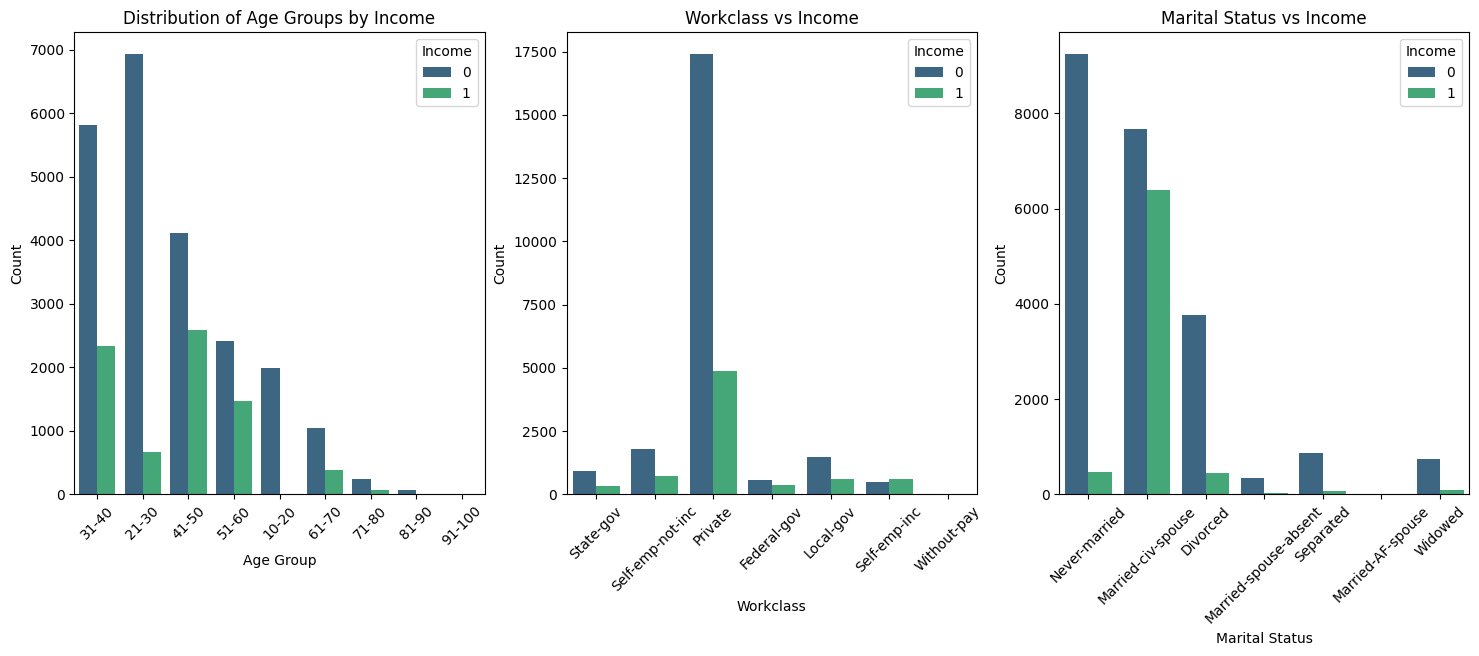

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribution of Age Groups by Income
sns.countplot(x='age_group', hue='class', data=adults_data, order=adults_data['age_group'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Age Groups by Income')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Income')

# Plot 2: Workclass vs Income
sns.countplot(x='workclass', hue='class', data=adults_data, palette='viridis', ax=axes[1])
axes[1].set_title('Workclass vs Income')
axes[1].set_xlabel('Workclass')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Income')

# Plot 3: Add another similar plot, for example, Marital Status vs Income
sns.countplot(x='marital-status', hue='class', data=adults_data, palette='viridis', ax=axes[2])
axes[2].set_title('Marital Status vs Income')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Income')

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.show()

**Distribution of Age Groups by Income**\
**Point**: This graph displays the distribution of income across various age groups, highlighting that younger individuals (18-25) are more likely to earn less than or equal to 50K, while older age groups (30-60) show a higher proportion of individuals earning more than $50,000.\
**Insight**: The age group analysis reveals that income potential generally increases with age, suggesting that experience and career advancement contribute to higher earnings.\
**Workclass vs Income**\
**Point**: This plot illustrates the relationship between different work classes and income levels, indicating that individuals employed in private sectors tend to have a higher representation in the higher-income bracket (>50K) compared to those in other work classes like self-employed or government.\
**Insight**: The significant difference in income distribution among various work classes underscores the impact of employment type on income levels, with private sector jobs generally offering better compensation.\
**Marital Status vs Income**\
**Point**: This graph presents the correlation between marital status and income, showing that married individuals have a higher proportion in the >50K income category compared to single or divorced individuals.\
**Insight**: The findings suggest that marital status may play a role in financial stability and income, possibly due to dual incomes in married households contributing to higher earnings.

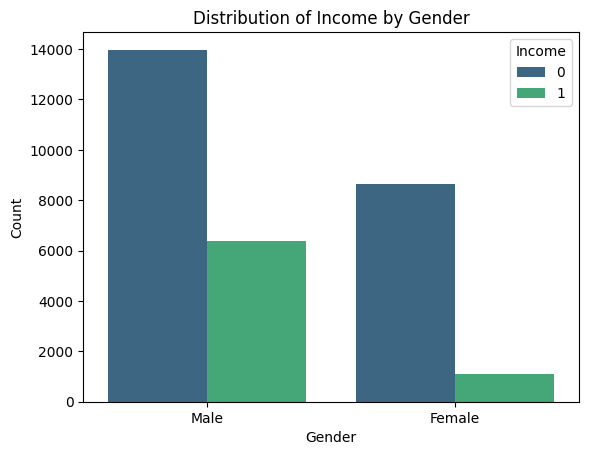

In [38]:
sns.countplot(x='sex', hue='class', data=adults_data, palette='viridis')
# Customize the plot
plt.title('Distribution of Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

**Point:** This plot shows the distribution of income based on gender, indicating that a higher proportion of males earn more than $50,000 compared to females, highlighting a potential income disparity between genders.

In [39]:
adults_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'age_group'],
      dtype='object')

In [40]:
adults_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703,0.249046
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753,0.432468
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [41]:
adults_data.describe(include="object")

,workclass,marital-status,occupation,relationship,race,sex,native-country
count,30139,30139,30139,30139,30139,30139,30139
unique,7,7,14,6,5,2,41
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22264,14059,4034,12457,25912,20366,27487


In [42]:
numerical_columns = adults_data.select_dtypes('number').columns.tolist()
numerical_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'class']

In [43]:
numerical_columns.remove("class")

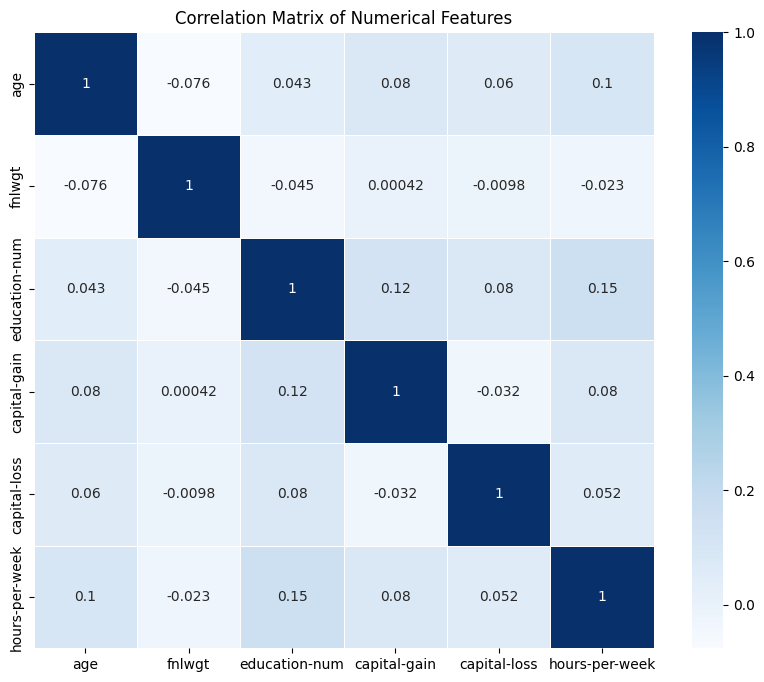

In [44]:
cor_matrix = adults_data[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Point:** The heatmap illustrates the correlation between numerical features in the dataset, showing relationships such as age and capital gain having a moderate positive correlation, while most other features exhibit weak correlations with each other.

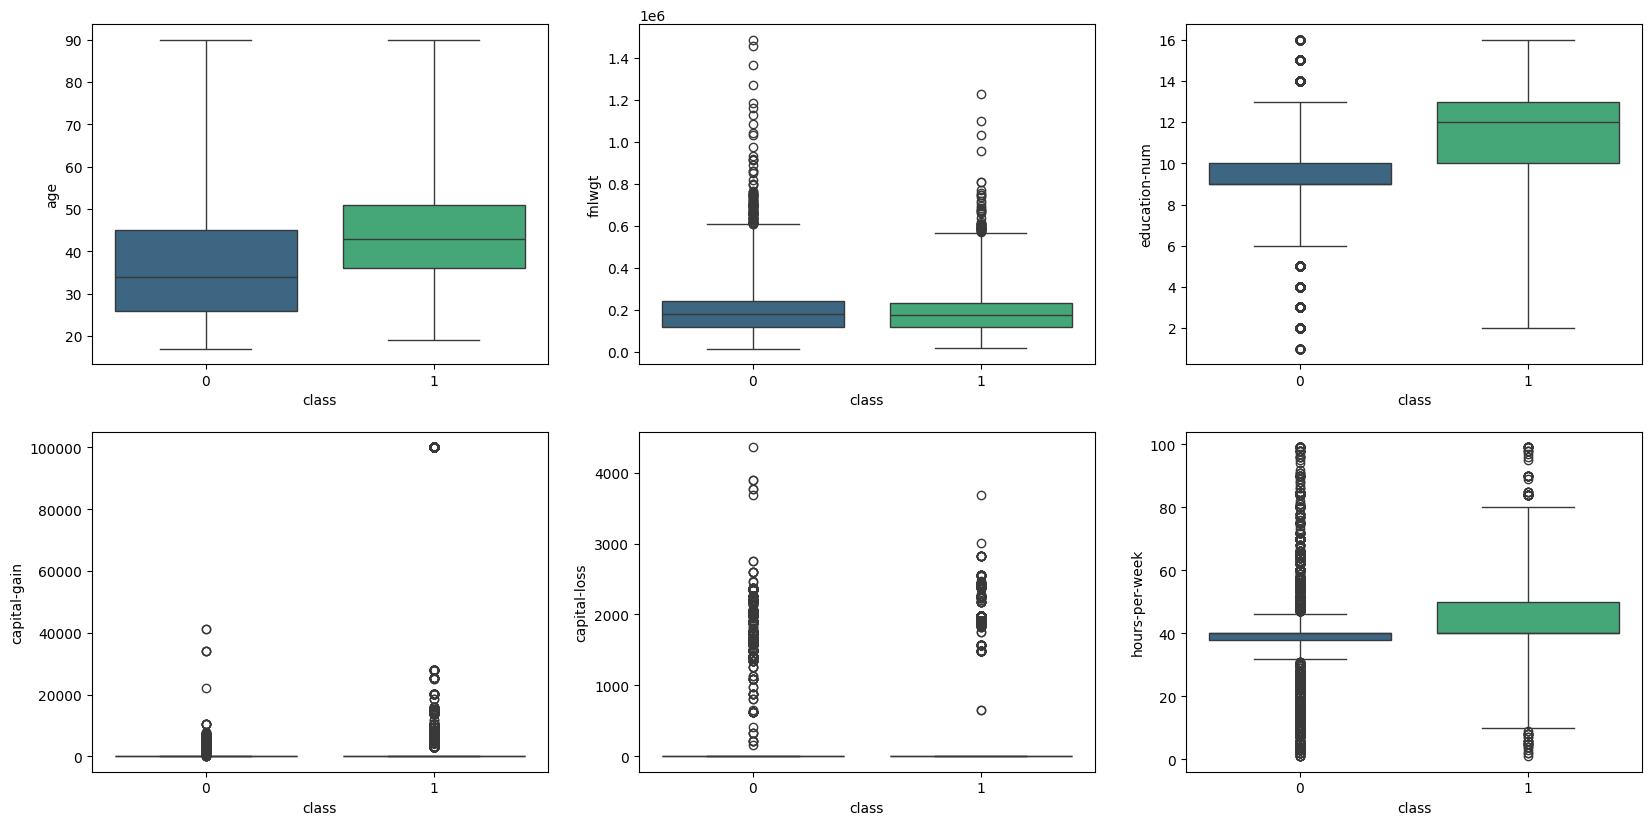

In [45]:
# Checking Outliers on Numerical Features by the Target // whis=3
index = 0
plt.figure(figsize=(20,15))
for feature in adults_data.select_dtypes(include=['number']).columns:
    if feature != "class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='class',y=feature,data=adults_data, whis=3, palette='viridis') 
plt.show()

The boxplots show the distribution of numerical features (like age, hours worked, etc.) based on income classification. Outliers are represented beyond the whiskers, indicating extreme values in each feature, with some noticeable differences between income classes.

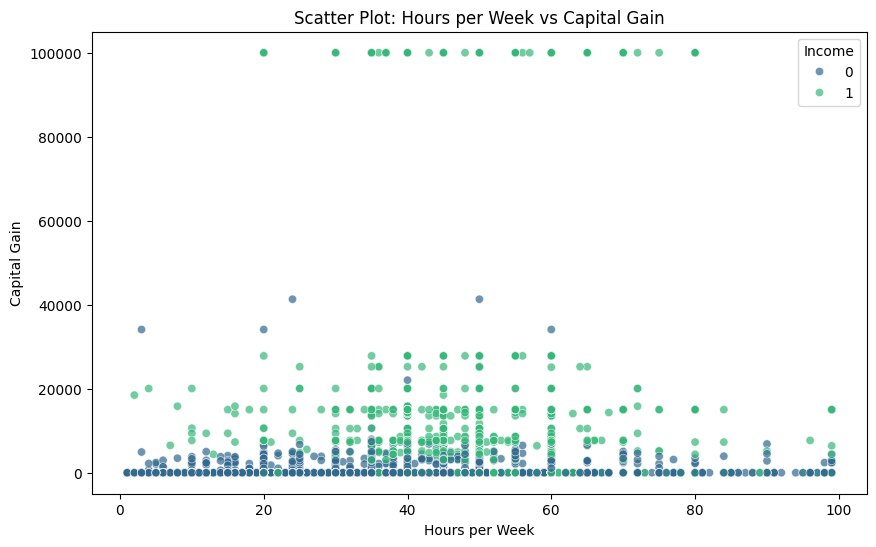

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours-per-week', y='capital-gain', hue='class', data=adults_data, palette='viridis', alpha=0.7)
plt.title('Scatter Plot: Hours per Week vs Capital Gain')
plt.xlabel('Hours per Week')
plt.ylabel('Capital Gain')
plt.legend(title='Income')
plt.show()


The scatter plot visualizes the relationship between hours worked per week and capital gain, showing a clear separation between income classes, with higher capital gains more prevalent among individuals earning over USD 50,000.

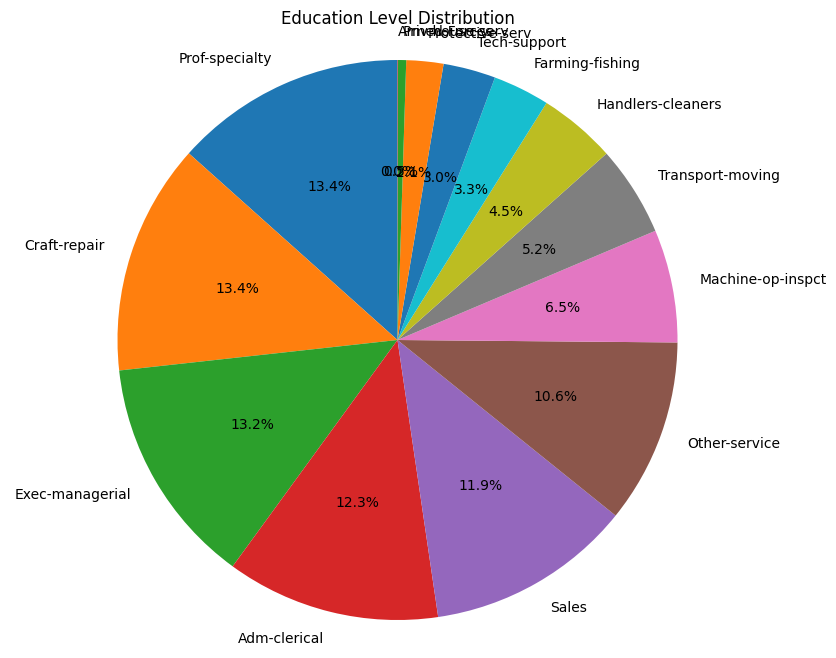

In [47]:
# Pie Chart for Education Level Distribution
education_distribution = adults_data['occupation'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(education_distribution, labels=education_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Education Level Distribution')
plt.axis('equal') 
plt.show()

Dominant Occupations: Some occupations, such as "Prof-specialty" or "Exec-managerial," may have larger slices, indicating these roles are more prevalent in the dataset.
Less Common Occupations: Smaller slices for roles like "Protective-serv" or "Handlers-cleaners" suggest these are less represented in the dataset.

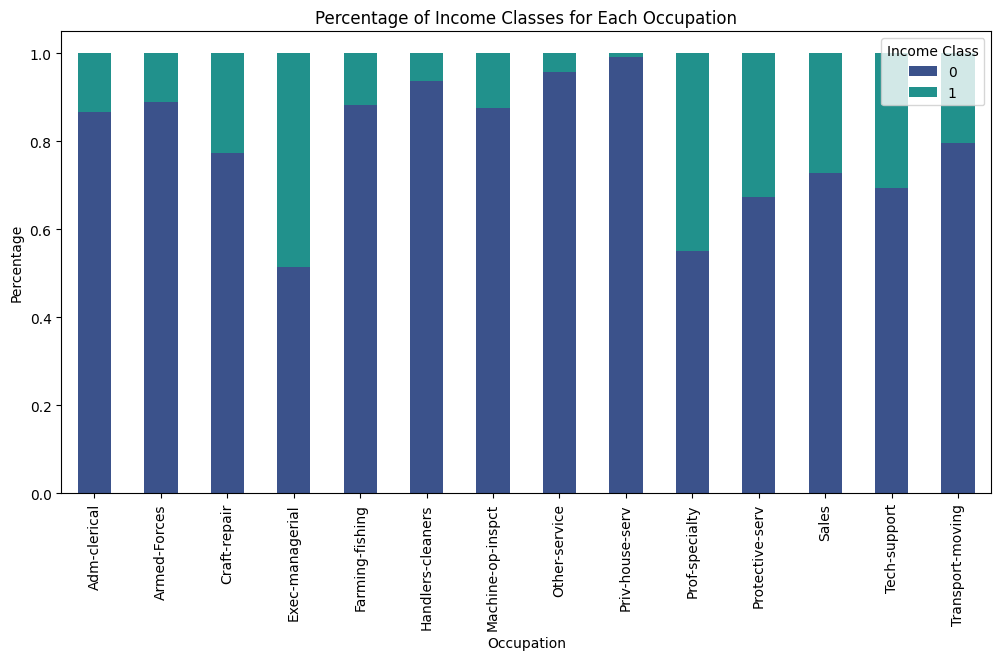

In [48]:
# Group by occupation and class, then normalize by occupation to get percentages
occupation_class_percent = adults_data.groupby(['occupation', 'class']).size().unstack()
occupation_class_percent = occupation_class_percent.div(occupation_class_percent.sum(axis=1), axis=0)

# Create a bar plot
occupation_class_percent.plot(kind='bar', stacked=True, figsize=(12,6), color=['#3b528b', '#21918c'])
plt.title('Percentage of Income Classes for Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.legend(title='Income Class', loc='upper right')
plt.show()


**Point:** This graph highlights the income disparity across occupations, with some professions having a much higher proportion of individuals earning above USD 50,000/year than others.\
**Insight:** Occupations like "Exec-managerial" and "Prof-specialty" have a higher proportion of individuals earning more than USD 50,000/year (darker bars), while occupations like "Handlers-cleaners" and "Machine-op-inspct" have a significantly lower percentage of high-income earners.

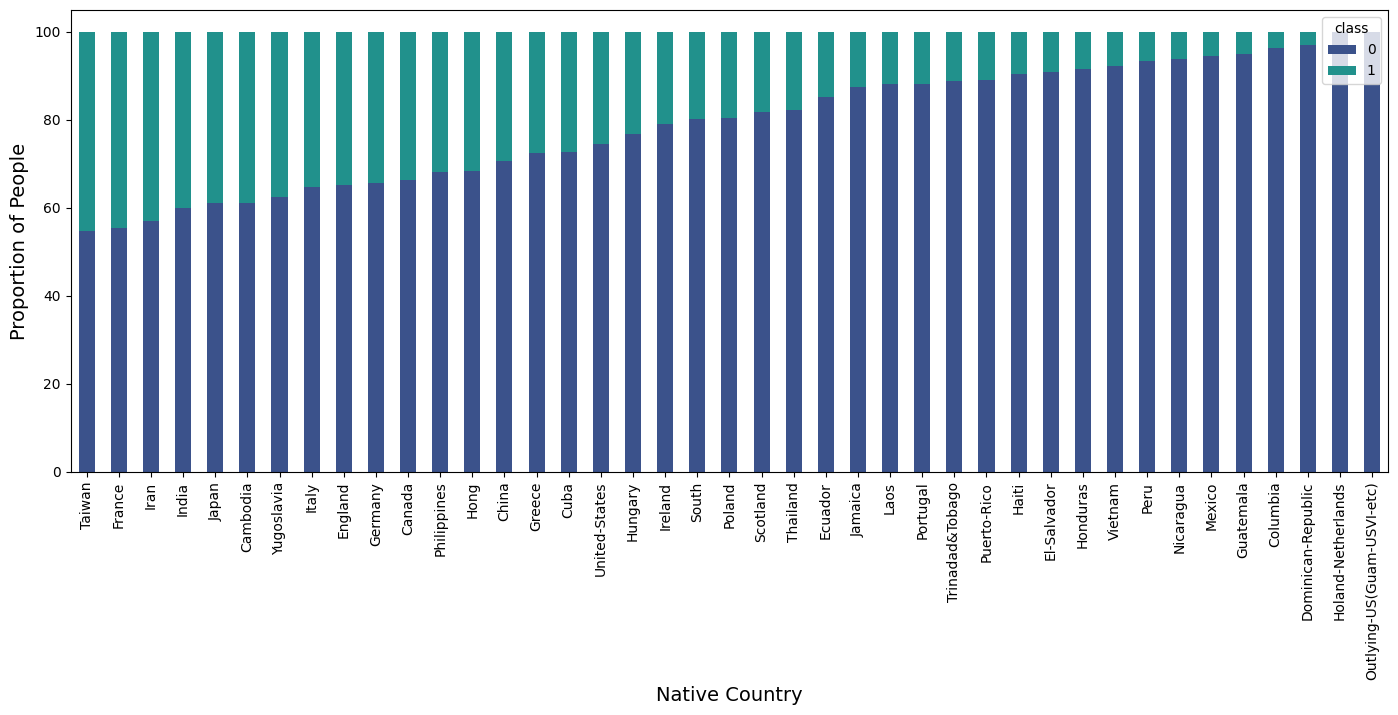

In [49]:
table_country = pd.crosstab(adults_data['native-country'], adults_data['class'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6), color=['#3b528b', '#21918c']);
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary
Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K.\
Race:- White and asain-pac-Islander earn salary more than 50K.\
marital_status :- 41% of married people seem to earn salary greater than 50K.\
People having degree doctorate,prof-school,masters are making salary more than 50K.\
Out of all the workclass only 59% self employed people are making salary more than 50K.\
If I check by occupation, Proportion of people making salary less than 50K is higher.\

In [50]:
def income_analysis_by_feature(data, feature):
    summary = data.groupby([feature, 'class']).size().unstack(fill_value=0)
    summary['Total'] = summary.sum(axis=1)
    summary['Percentage <=50K'] = (summary[0] / summary['Total']) * 100
    summary['Percentage >50K'] = (summary[1] / summary['Total']) * 100
    return summary
    
work_class_analysis = income_analysis_by_feature(adults_data, 'workclass')
print("\nIncome Analysis by Work Class:")
work_class_analysis_df = pd.DataFrame(work_class_analysis)
work_class_analysis_df


Income Analysis by Work Class:


class,0,1,Total,Percentage <=50K,Percentage >50K
workclass,,,,,
Federal-gov,578,365,943,61.293743,38.706257
Local-gov,1458,609,2067,70.537010,29.462990
Private,17390,4874,22264,78.108157,21.891843
Self-emp-inc,474,600,1074,44.134078,55.865922
Self-emp-not-inc,1784,714,2498,71.417134,28.582866
State-gov,935,344,1279,73.103987,26.896013
Without-pay,14,0,14,100.000000,0.000000


In [51]:
X_train = adults_data_encode.drop('class', axis=1)
Y_train = adults_data_encode['class']

### Scaling

In [52]:
# scaling
numerical_cols = adults_data_encode.select_dtypes("number").columns.tolist()
numerical_cols.remove("class")
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train[numerical_cols].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.042516,-1.062676,1.128996,0.145925,-0.218673,-0.078031
1,0.880215,-1.007829,1.128996,-0.147502,-0.218673,-2.332060
2,-0.033639,0.244669,-0.440434,-0.147502,-0.218673,-0.078031
3,1.108678,0.425206,-1.225149,-0.147502,-0.218673,-0.078031
4,-0.795183,1.406572,1.128996,-0.147502,-0.218673,-0.078031


In [53]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.042516,-1.062676,1.128996,0.145925,-0.218673,-0.078031,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0.880215,-1.007829,1.128996,-0.147502,-0.218673,-2.332060,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,-0.033639,0.244669,-0.440434,-0.147502,-0.218673,-0.078031,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1.108678,0.425206,-1.225149,-0.147502,-0.218673,-0.078031,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,-0.795183,1.406572,1.128996,-0.147502,-0.218673,-0.078031,False,True,False,False,False,False,False,True,False,False,Fal

### Cleaning, Scaling and Encoding the Test Data

In [54]:
adults_test.isna().sum()

age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
class             1
dtype: int64

In [55]:
# Separate categorical and numberical columns
cat_col = adults_test.dtypes[adults_test.dtypes == 'object']
num_col = adults_test.dtypes[adults_test.dtypes != 'object']
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adults_test[col].value_counts()
    percent = adults_test[col].value_counts() / adults_test.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Age-------------------------
                      total   percent
age                                  
35                      461  0.028313
33                      460  0.028252
23                      452  0.027761
36                      450  0.027638
38                      437  0.026839
...                     ...       ...
84                        3  0.000184
89                        2  0.000123
85                        2  0.000123
87                        2  0.000123
|1x3 Cross validator      1  0.000061

[74 rows x 2 columns]


--------------------Workclass-------------------------
                  total   percent
workclass                        
Private           11210  0.688490
Self-emp-not-inc   1321  0.081133
Local-gov          1043  0.064058
?                   963  0.059145
State-gov           683  0.041948
Self-emp-inc        579  0.035561
Federal-gov         472  0.028989
Without-pay           7  0.000430
Never-worked          3  0.000184


-

In [56]:
adults_test.duplicated().sum()

np.int64(5)

In [57]:
# remove this row 
adults_test[adults_test['workclass'].isnull()] 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None


In [58]:
# replacing the "?" with null values
adults_test.replace("?",np.nan, inplace=True)
adults_test.isna().sum()

age                 0
workclass         964
fnlwgt              1
education           1
education-num       1
marital-status      1
occupation        967
relationship        1
race                1
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native-country    275
class               1
dtype: int64

In [59]:
adults_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.


In [60]:
adults_test.shape

(16282, 15)

In [61]:
# dropping the null values
adults_test.dropna(inplace=True)
adults_test.shape

(15060, 15)

In [62]:
adults_test.duplicated().sum()

np.int64(5)

In [63]:
# dropping duplicate rows
adults_test.drop_duplicates(inplace=True)

In [64]:
adults_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [65]:
adults_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15055 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             15055 non-null  object 
 1   workclass       15055 non-null  object 
 2   fnlwgt          15055 non-null  float64
 3   education       15055 non-null  object 
 4   education-num   15055 non-null  float64
 5   marital-status  15055 non-null  object 
 6   occupation      15055 non-null  object 
 7   relationship    15055 non-null  object 
 8   race            15055 non-null  object 
 9   sex             15055 non-null  object 
 10  capital-gain    15055 non-null  float64
 11  capital-loss    15055 non-null  float64
 12  hours-per-week  15055 non-null  float64
 13  native-country  15055 non-null  object 
 14  class           15055 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.8+ MB


In [66]:
adults_test["age"] = pd.to_numeric(adults_test.age, errors="coerce")
for i in adults_test:
    if (adults_test[i].dtypes == 'object'):
        print(adults_test[i].unique())

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
['Male' 'Female']
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland'

In [67]:
adults_test.drop("education", axis =1, inplace=True)
adults_test.head(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,25,Private,226802.0,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.


In [68]:
adults_test_encode = adults_test 

In [69]:
for column in binary_columns:
    adults_test_encode[column]=adults_test_encode[column].replace({"<=50K.":0, ">50K.":1 }) 
adults_test_encode.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,25,Private,226802.0,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
6,34,Private,198693.0,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


In [70]:
# encoding
cat_data = adults_test_encode.select_dtypes("object").columns.tolist()
adults_test_encode = pd.get_dummies(adults_test_encode, columns=cat_data, drop_first=True)
adults_test_encode.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1,25,226802.0,7.0,0.0,0.0,40.0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,38,89814.0,9.0,0.0,0.0,50.0,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,28,336951.0,12.0,0.0,0.0,40.0,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,44,160323.0,10.0,7688.0,0.0,40.0,1,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,34,198693.0,6.0,0.0,0.0,30.0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False

In [71]:
X_test = adults_test_encode.drop('class', axis = 1)
Y_test = adults_test_encode['class']

In [72]:
# Scaling
num_val = adults_test_encode.select_dtypes('number').columns.tolist()
num_val.remove("class")
X_test[num_val] = scaler.transform(X_test[num_val])
X_test.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1,-1.023647,0.350256,-1.225149,-0.147502,-0.218673,-0.078031,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,-0.033639,-0.946280,-0.440434,-0.147502,-0.218673,0.756794,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [73]:
print(X_train.shape)
print(X_test.shape)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

(30139, 81)
(15055, 80)


In [74]:
X_test.shape

(15055, 81)

### Applying Machine Learning Models

We apply a Random Forest Classifier to predict whether an individual earns more than $50K based on their features. The model's accuracy and performance metrics are evaluated.

### RandomForestClassifier

In [75]:
# Initialize and train Random Forest Classifier
rfclass = RandomForestClassifier(n_estimators=100, random_state=20)
rfclass.fit(X_train, Y_train)

RandomForestClassifier(random_state=20)

In [76]:
Y_pred = rfclass.predict(X_test)
accuray_score = accuracy_score(Y_test, Y_pred)
print(f"Accuracy by Random Forset Classifier: {accuray_score*100}")

Accuracy by Random Forset Classifier: 84.91531052806377


#### Evaluating Model Performance
We evaluate the model using accuracy, confusion matrix, and classification report.

In [77]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[10503   852]
 [ 1419  2281]]


In [78]:
# checking other evaluating metrixs
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11355
           1       0.73      0.62      0.67      3700

    accuracy                           0.85     15055
   macro avg       0.80      0.77      0.79     15055
weighted avg       0.84      0.85      0.84     15055



The model achieves a high overall accuracy of 85%, with strong precision and recall for predicting individuals earning less than or equal to USD 50,000/year (class 0). However, it performs notably lower for predicting individuals earning more than USD 50,000/year (class 1), with a recall of only 62%, indicating it misses a significant portion of higher-income individuals.

### Applying other models - Logistic Regression

In [79]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [80]:
Y_pred_2 = model.predict(X_test)
lr_accuracy_score = accuracy_score(Y_test,Y_pred)
print("Accuracy: {:.2f}%".format(lr_accuracy_score * 100))

Accuracy: 84.92%


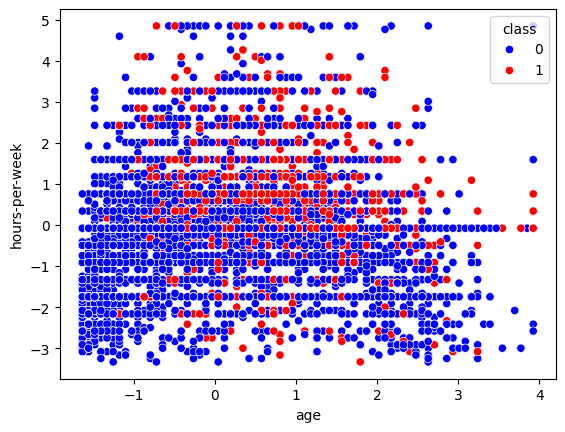

In [81]:
sns.scatterplot(x=X_test['age'], y=X_test['hours-per-week'], hue=Y_test, palette={0:'blue', 1:'red'}, marker='o')
plt.show()

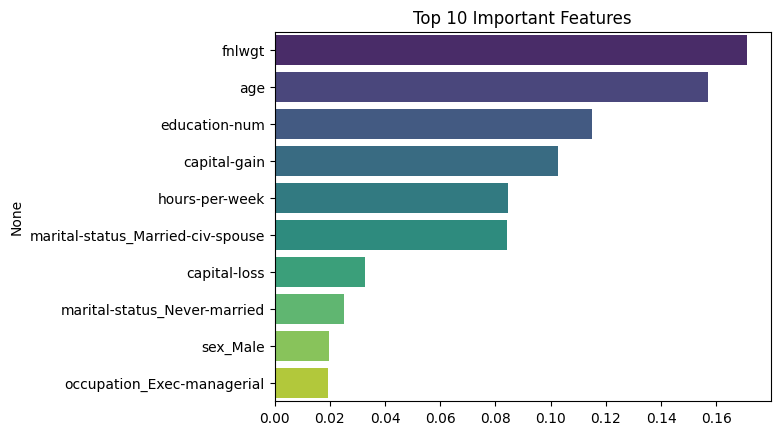

In [82]:
# Feature importance
importances = rfclass.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the most important features
# plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X_train.columns[indices][:10], palette='viridis')
plt.title('Top 10 Important Features')
plt.savefig('impfeatures.png', bbox_inches='tight')
plt.show()


## Applying XGBoost:

In [83]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)
y_pred_3 = xgb_model.predict(X_test)
accuray_score_xg = accuracy_score(Y_test, y_pred_3)

In [84]:
print(f"Accuracy by XGBoost Classifier: {accuray_score_xg*100}")

Accuracy by XGBoost Classifier: 86.98771172367984


In [85]:
train_accuracy = xgb_model.score(X_train, Y_train)
print(f"Accuracy by XGBoost Classifier: {train_accuracy*100}")

Accuracy by XGBoost Classifier: 89.7275954743024


In [86]:
conf_matrix = confusion_matrix(Y_test, y_pred_3)
print(conf_matrix)

[[10643   712]
 [ 1247  2453]]


In [87]:
# checking other evaluating metrixs
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11355
           1       0.73      0.62      0.67      3700

    accuracy                           0.85     15055
   macro avg       0.80      0.77      0.79     15055
weighted avg       0.84      0.85      0.84     15055



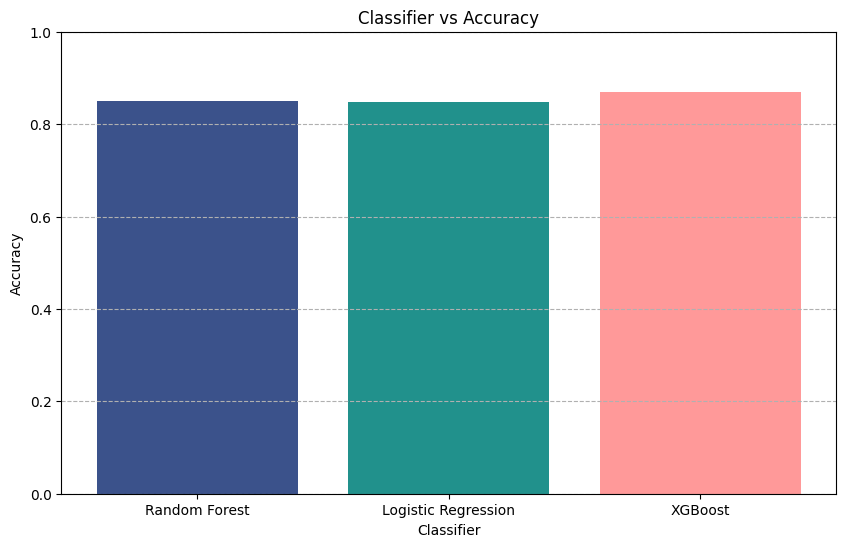

In [88]:
from xgboost import XGBClassifier

np.random.seed(0)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.choice([0, 1], size=1000)  # Binary target variable

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

accuracies = {}

for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracies[name] = accuracy_score(Y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['#3b528b', '#21918c', '#ff9999'])
plt.title('Classifier vs Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.grid(axis='y', linestyle='--')
plt.show()

This graph compares the accuracy of three classifiers—Random Forest, Logistic Regression, and XGBoost—demonstrating their effectiveness in predicting binary outcomes. Each classifier's performance is visualized, highlighting the differences in accuracy